<a href="https://colab.research.google.com/github/fmwashimba/Autolib-Cars/blob/main/Copy_of_Financial_Inclusion_As_a_solution_of_Economic_and_Human_Development_In_Africa_A_study_of_4_East_African_Countries%3B_Kenya%2CUganda_%2CTanzania_and_Rwanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Anaylisis Question.**
To figure out how we can predict which individuals are most likely to have or use a bank account. And by doing this will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

**How I will do the Predictions **

            A) Defining the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
            B) Finding and dealing with outliers, anomalies, and missing data within the dataset.
            C) Performing univariate, bivariate and multivariate analysis recording my observations.
            D)Implementing  the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
            E) Challenging my solution by providing insights on how you can make improvements.
A) i) **The Context**
The information we are going to use is from a study done in portion of our population for both in rural and urban areas in Kenya done by finaccess and uganda,Tanzania and Rwanda done by Finscope.
i) **Experimental Design**
a) Studying and familirizing with the data 
b) Comparing the data with other sources of data ie from www.fdskenya.org, reading journals from international institute of Social and Economic Sciences 
c) Data Loading ,preparation and cleaning 
d)Exploratory Data Analysis 
e)Implementing the Solution
F)Challanging my solution.

Data Loading

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [ ]:
#We upload dataset from the source with the first and the last 5 rows of the data and with all columns

df =pd.read_csv("https://bit.ly/FinancialDataset")
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.tail(5)


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


Number of rows and columns

In [ ]:
df.shape


(23524, 13)

VARIABLES DEFINATIONS

In [ ]:
VD=pd.read_csv("https://bit.ly/VariableDefinitions")
print(VD)

      Variable Definitions                                         Unnamed: 1
0                  country                         Country interviewee is in.
1                     year                           Year survey was done in.
2                 uniqueid             Unique identifier for each interviewee
3            location_type                     Type of location: Rural, Urban
4         cellphone_access  If interviewee has access to a cellphone: Yes, No
5           household_size               Number of people living in one house
6        age_of_respondent                         The age of the interviewee
7     gender_of_respondent                Gender of interviewee: Male, Female
8   relationship_with_head  The interviewee’s relationship with the head o...
9           marital_status  The martial status of the interviewee: Married...
10         education_level  Highest level of education: No formal educatio...
11                job_type  Type of job interviewee has: Farming

We determine the type of data in filled out in the columns

In [ ]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

From the observation above year, household size and respondent Age the data type is numerical and the rest of the columns are categorical 

**DATA CLEANING** 

1) **Removing irrelevant data**

From observation of the data all information in the columns are valid for this study so we have no data to remove .

2) **Removing duplicated data from our dataset first by checking if there are any duplicates**

In [ ]:
df.duplicated().sum()

0

There are zero duplicates of the data meaning there will be no irrelevant observation.

3)**We fix Structural errors ie long namings,incorrect word use or misspellings and columns which are not going to be used in the analysis.**

In [ ]:
df.rename(columns ={'Level of Educuation':'education','Respondent Age':'age','gender_of_respondent':'gender','Type of Location':'location'},inplace =True)
df.columns  

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'location',
       'Cell Phone Access', 'household_size', 'age', 'gender',
       'The relathip with head', 'marital_status', 'education', 'Type of Job'],
      dtype='object')

In [ ]:
df= df.drop(['uniqueid','year','marital_status','household_size'],axis = 1)
print(df.columns)

Index(['country', 'Has a Bank account', 'location', 'Cell Phone Access', 'age',
       'gender', 'The relathip with head', 'education', 'Type of Job'],
      dtype='object')


4) **Handling Missing Data**

In [ ]:
#We start by checking i there are any missing data and blank spaces 
df.isnull().sum()

country                   14
Has a Bank account        36
location                  15
Cell Phone Access         11
age                       34
gender                    34
The relathip with head     4
education                 29
Type of Job               30
dtype: int64

In [ ]:
df = df.dropna(axis=0, inplace=False)

In [ ]:
df.isnull().sum()

country                   0
Has a Bank account        0
location                  0
Cell Phone Access         0
age                       0
gender                    0
The relathip with head    0
education                 0
Type of Job               0
dtype: int64

In [ ]:
df.shape

(23384, 9)

5)**Filtering out data Outliers and Anomalies**



checking outliers in columns age 

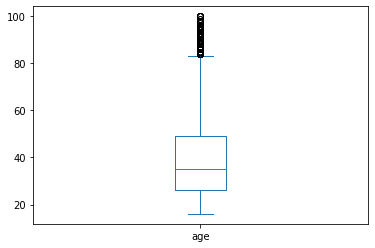

In [ ]:
df[['age']].plot(kind='box')
plt.show()

checking anomalies in columns age 



In [ ]:
df['age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

6) **Validating My Data**

I have enough , clean and accurate  data to work with.
The data is uniformly formatted in a design or language that my analysis tools can work with

**EXPLORATORY DATA ANAYLSIS**

UNIVERIATE ANALYSIS

a) Numerical Variable using age Variable

In [ ]:
df['age'].describe()

count    23384.000000
mean        38.804225
std         16.524913
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age, dtype: float64

Determing the quantile

In [ ]:
quantile_age =df["age"].quantile([0.25,0.5,0.75])
print(quantile_age)

0.25    26.0
0.50    35.0
0.75    49.0
Name: age, dtype: float64


Determining the age range


In [ ]:
#age_range = max_age-min_age 
100-16

84

Determing the skewness and Kurtosis of the data

This distribution has skew 0.8421672089915798
This distribution has kurtosis 0.10235952222757305


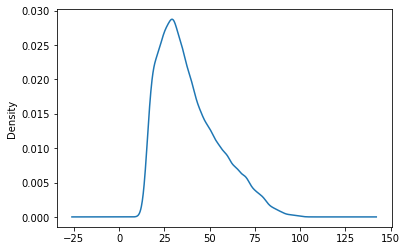

In [ ]:
df['age'].plot(kind='density')
print('This distribution has skew', df['age'].skew())
print('This distribution has kurtosis', df['age'].kurt())

The kurtosis is 0.1 meaning it has a thinner tail and the skweness is 0.84 meaning the data is moderately skewed.

Histogram of Age

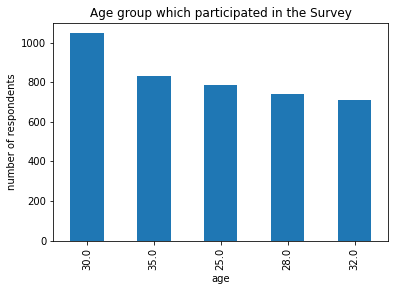

In [ ]:
df['age'].value_counts().head().plot.bar()
plt.xlabel("age")
plt.ylabel("number of respondents")
plt.title("Age group which participated in the Survey")
plt.show()


b) Categorical Variable using Country 

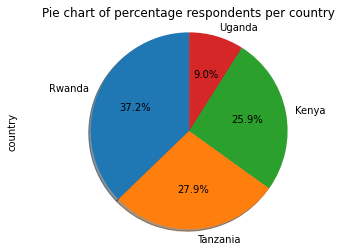

In [ ]:
#pie chart for countries
df.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()

We notice that Rwanda had more respondents in this research compared to other countires and Uganda had the least number of respondents.

Lets Use gender Variable

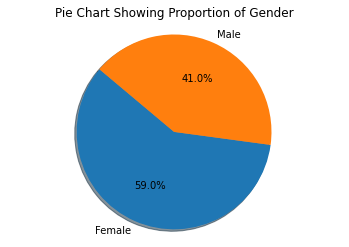

In [ ]:
df['gender'].count()
plt.pie(df['gender'].value_counts() , labels = df.gender.unique(), autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of Gender')
plt.show()

The observation is more females 59% participated in the research compared 41% male.

Lets check on the location VAriable using a pie chart 

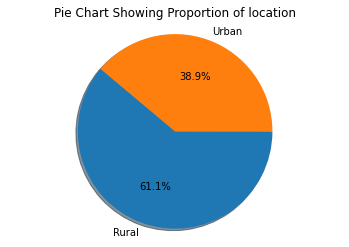

In [ ]:
df['location'].count()
plt.pie(df['location'].value_counts() , labels = df.location.unique(), autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart Showing Proportion of location')
plt.show()

More people participated in the survey 61.1% and 38.9% were from urban areas

Lets check on education Variable

In [ ]:
df['education'].value_counts()

Primary education                  12719
No formal education                 4475
Secondary education                 4210
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

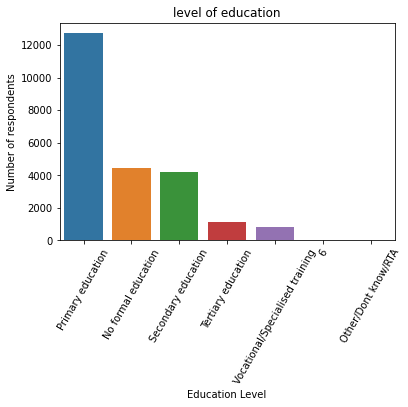

In [ ]:
# plotting a chart for the level of education
ax = sns.countplot(df['education'], order = df['education'].value_counts().index)
# formatting and labelling the chart
plt.title("level of education")
plt.xlabel("Education Level")
plt.ylabel("Number of respondents")
plt.xticks(rotation=60)

Lets check on Has a bank on pie chart. 

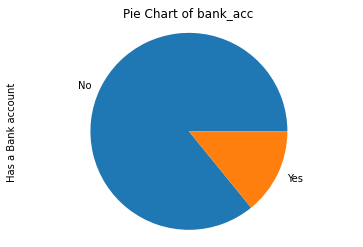

In [ ]:
df["Has a Bank account"].value_counts()
df["Has a Bank account"].value_counts()
df["Has a Bank account"].value_counts().head().plot.pie()
plt.axis('equal')
plt.title('Pie Chart of bank_acc')
plt.show()

Huge size of the respondents do not have bank accounts.

BIVARIATE ANALYSIS

Bivariate analysis, check relationships and differences between two variables.
We will start with Categorical-Numeric variables and then Categorical-categorical


**Categorical-Numerical Variables**

Lets check which numerical data we have 

In [ ]:
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

age    float64
dtype: object

Age Group Vs Has a Bank Account.

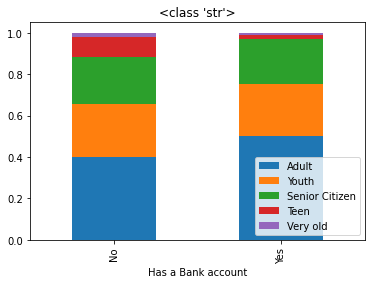

In [ ]:
bins= [10,20,30,50,80,100]
labels = ['Teen','Youth','Adult','Senior Citizen','Very old']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df
ax6 = df.groupby('Has a Bank account')['AgeGroup'].value_counts(normalize=True).unstack()
ax6.plot(kind='bar', stacked='True',title=str)
int_level = df['Has a Bank account'].value_counts()

Majority of adults have bank accounts followed by youth ,senior citizens,teens and very old in that order.

**Categorical-Categorical Variable**



Phone Access Vs Location 

Text(0, 0.5, 'Location')

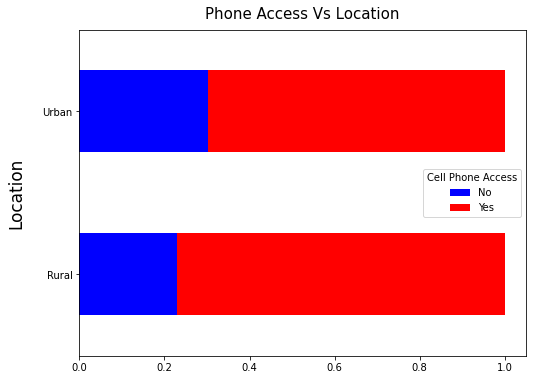

In [ ]:
loc = df.groupby('location')['Cell Phone Access'].value_counts(normalize=True).unstack()

colors= ['blue', 'red']

loc.plot(kind='barh', figsize=(8, 6), color=colors, stacked=True)
plt.title('Phone Access Vs Location', fontsize=15, y=1.015)
plt.xticks(rotation = 360)
plt.ylabel('Location', fontsize=17, labelpad=17)

People in the rural areas have more access to phones but this is due to the respondents of this survey most of them came from the rural area.

Gender Vs Has a Bank Account

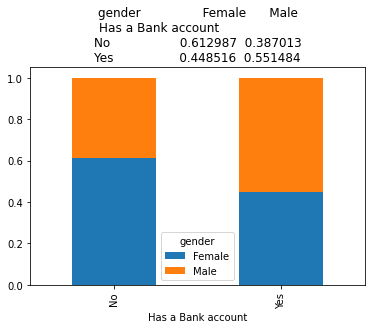

In [ ]:
ax1 = df.groupby('Has a Bank account')['gender'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df['Has a Bank account'].value_counts()

More males have bank accounts compared to females.

Type of Job Vs Has a bank account

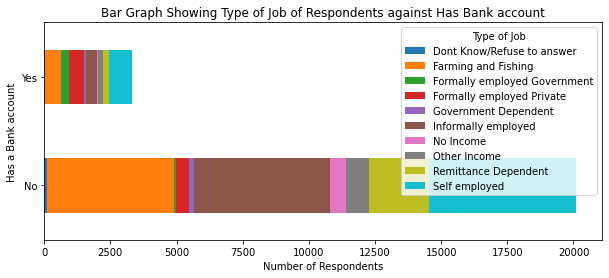

In [ ]:

Has_a_Bank_account = df.groupby(['Has a Bank account','Type of Job'])['Has a Bank account'].count().unstack('Type of Job')
ax = Has_a_Bank_account.plot.barh(stacked=True, edgecolor='none',figsize=(10,4))
plt.title('Bar Graph Showing Type of Job of Respondents against Has Bank account')
plt.xlabel('Number of Respondents')
plt.ylabel('Has a Bank account')
horiz_offset = 1.05
vert_offset = 1.

Majority of the respondents do not have bank accounts and this is irrespective of their type of Job all the same among those who have bank accounts majority are self employed.

**MULTIVARIATE ANALYSIS**

We will perform the Principle component Analysis first by doing a Correlation Matrix to check relation of dependant and independent variables by first doing label encoding.



Correlationn Matrix

In [ ]:


df["Has a Bank account"] = df["Has a Bank account"].astype('category').cat.codes
df["country"] = df["country"].astype('category').cat.codes
df["location"] = df["location"].astype('category').cat.codes
df["Cell Phone Access"] = df["Cell Phone Access"].astype('category').cat.codes
df["gender"] = df["gender"].astype('category').cat.codes
df["The relathip with head"] = df["The relathip with head"].astype('category').cat.codes
df["education"] = df["education"].astype('category').cat.codes
df["Type of Job"] = df["Type of Job"].astype('category').cat.codes
df['AgeGroup']=df['AgeGroup'].astype('category').cat.codes
df.head()



,country,Has a Bank account,location,Cell Phone Access,age,gender,The relathip with head,education,Type of Job,AgeGroup
0,0,1,0,1,24.0,0,5,4,9,1
1,0,0,0,0,70.0,0,1,1,4,3
2,0,1,1,1,26.0,1,3,6,9,1
3,0,0,0,1,34.0,0,1,3,3,2
4,0,0,1,0,26.0,1,0,3,5,1


In [ ]:
df.corr()

,country,Has a Bank account,location,Cell Phone Access,age,gender,The relathip with head,education,Type of Job,AgeGroup
country,1.000000,-0.160961,0.150312,-0.149134,-0.058870,-0.027076,0.130267,-0.050997,0.379699,-0.055344
Has a Bank account,-0.160961,1.000000,0.088485,0.209576,0.019362,0.116441,-0.070226,0.322710,-0.063019,0.051486
location,0.150312,0.088485,1.000000,-0.083535,-0.047677,0.012957,0.016768,0.127588,0.367288,-0.048082
Cell Phone Access,-0.149134,0.209576,-0.083535,1.000000,-0.103830,0.102210,-0.048771,0.252157,-0.144952,-0.037260
age,-0.058870,0.019362,-0.047677,-0.103830,1.000000,0.013222,-0.150565,-0.353094,-0.103237,0.905202
gender,-0.027076,0.116441,0.012957,0.102210,0.013222,1.000000,-0.472102,0.119190,-0.030119,0.007788
The relathip with head,0.130267,-0.070226,0.016768,-0.048771,-0.150565,-0.472102,1.000000,-0.017386,0.040581,-0.093889
education,-0.050997,0.322710,0.127588,0.252157,-0.353094,0.119190,-0.017386,1.000000,0.044495,-0.323915
Type of Job,0.379699,-0.063019,0.367288,-0.144952,-0.103237,-0.030119,0.040581,0.044495,1.000000,-0.113605
AgeGroup,-0.055344,0.051486,-0.048082,-0.037260,0.905202,0.007788,-0.093889,-0.323915,-0.113605,1.000000


There is a weak correlation between having a bank account and gender 
There is a minimal correlation between having a bank account and age 
There is a weak correlation of having a bank account and the relationship with the head.

Principle Component Analysis

In [ ]:
import scipy.stats as stats

In [ ]:
df.head(3)

,country,Has a Bank account,location,Cell Phone Access,age,gender,The relathip with head,education,Type of Job,AgeGroup
0,0,1,0,1,24.0,0,5,4,9,1
1,0,0,0,0,70.0,0,1,1,4,3
2,0,1,1,1,26.0,1,3,6,9,1


Reduction Techniques

In [ ]:
x = df.drop(['Has a Bank account','age'],axis=1)
y = df['Has a Bank account']

Dividing data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


Performing feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Performing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.22086315, 0.19138472, 0.17029266, 0.11008797, 0.10344069,
       0.07479337, 0.06916227, 0.05997517])

Training and Making Predictions
using the random forest classifier to evaluate the performance of PCA


In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Evaluating the Performance
With the help of a confusion matrix and find the accuracy of the prediction.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[3994    0]
 [ 683    0]]
Accuracy0.8539662176608938


We can see that with PCA, we have achieved an accuracy of 85.3%, 


DISCRIMANT ANALYSIS USING LINEAR DISCRIMINANT 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print(x_test)
print(x_train)


[[ 0.62062938]
 [-1.26062994]
 [-0.87744628]
 ...
 [ 0.39709573]
 [ 0.33556913]
 [ 0.58516511]]
[[-0.3139787 ]
 [-0.02384524]
 [-0.32948169]
 ...
 [ 1.9738233 ]
 [ 0.05768645]
 [ 2.33139056]]


Training and Making Predictions
using the random forest classifier to evaluate the performance of a LDA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Evaluating the Performance with the help of a confusion matrix and find the accuracy of the prediction.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[7801  204]
 [ 929  420]]
Accuracy0.8788753474449433


We can see that with one linear discriminant Analysis, we achieved an accuracy of 88%,

**Observation from the Multivariate Analysis**
Techniques used are Principle Component Analysis and Linear Discriminant Analysis.
The model achieved accuracy of 85% with PCA and 88% with LDA

**Recommendations on Improvements **

a)Upon obseravtion there was more data collected from other countries compared to others, I suggest the data collection could be more informative if we could target an equal number of respondents for each country.
b)Most data was colleccted from the rural areas which is obvious to me that the results will have a bias since banks are not many in the rural areas and most of them there are not on formal employment.
c)I did not see how relationship with the head can influence someone having a bank account so that could be replaced with a question like how do you finance your day to day needs?